# Parte I : Estadística Descriptiva
1. Hacer las siguientes gráficas de barras con los valores de los datos: "puntaje promedio en matemáticas por programa" , "número de admitidos en cada programa". ¿Qué puede decir de las gráficas? Explicar los resultados obtenidos.

In [8]:
# Importa la librería pandas para manipulación y análisis de datos en estructuras tipo DataFrame.
import pandas as pd 

# Importa matplotlib.pyplot para realizar gráficos y visualizaciones de datos.
import matplotlib.pyplot as plt

# Importa pearsonr de scipy.stats para calcular el coeficiente de correlación de Pearson entre dos variables.
from scipy.stats import pearsonr

# Importa numpy para operaciones numéricas avanzadas, como el cálculo de percentiles y estadísticas.
import numpy as np

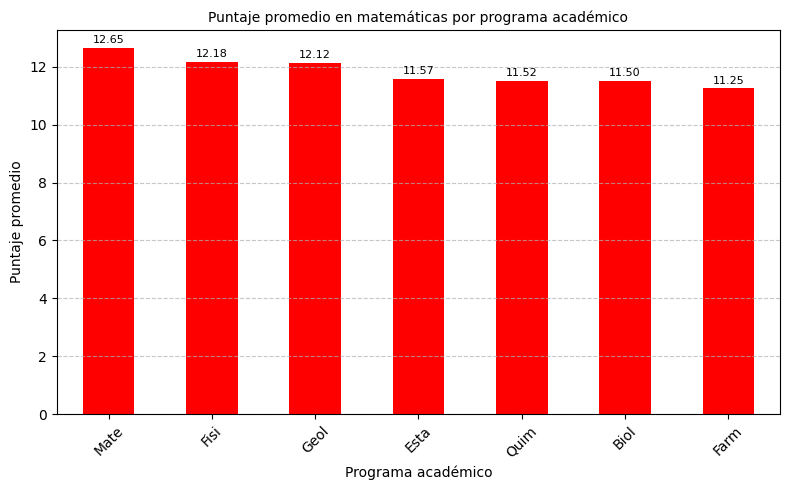

In [9]:
# Lee los datos desde un archivo Excel y los almacena en un DataFrame llamado 'datos'
datos = pd.read_excel("datos_uni_ciencias.xlsx")

# Calcula el puntaje promedio en matemáticas agrupado por programa académico y lo ordena de mayor a menor
Promedio_mate = datos.groupby('Carrera')['Matemáticas'].mean().sort_values(ascending = False)

# Crea una figura para la gráfica de barras
plt.figure(figsize=(8, 5))

# Grafica el puntaje promedio en matemáticas por programa académico como barras rojas
Promedio_mate.plot(kind='bar', color='red')

# Añade título y etiquetas a los ejes
plt.title('Puntaje promedio en matemáticas por programa académico', fontsize=10)
plt.xlabel('Programa académico', fontsize=10)
plt.ylabel('Puntaje promedio', fontsize=10)

# Rota las etiquetas del eje x para mejor visualización
plt.xticks(rotation=45)

# Añade una linea horizontal tipo cadena para facilitar la lectura de valores
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Añade el valor numérico encima de cada barra
for i, v in enumerate(Promedio_mate):
    plt.text(i, v + 0.1, f'{v:.2f}', ha='center', va='bottom', fontsize=8)

# Ajusta el diseño para evitar que se sobrepongan los elementos
plt.tight_layout()

# Muestra la gráfica
plt.show()

El análisis de los promedios en matemáticas por programa académico dentro del área de ciencias revela diferencias significativas en el desempeño de los estudiantes. Los datos muestran que los estudiantes admitidos en Matemáticas obtienen los puntajes más altos en esta disciplina; mientras que los estudiantes de Farmacia registran los promedios más bajos en matemáticas.

In [ ]:
# Calcula el número de admitidos en cada programa académico y los ordena de mayor a menor
num_admi_programa = datos['Carrera'].value_counts().sort_values(ascending=False)

# Crea una figura para la gráfica de barras
plt.figure(figsize=(8, 5))

# Grafica el número de admitidos por programa académico como barras azules
num_admi_programa.plot(kind='bar', color='blue')

# Añade título y etiquetas a los ejes
plt.title('Número de admitidos por programa académico', fontsize=10)
plt.xlabel('Programa académico', fontsize=10)
plt.ylabel('Número de admitidos', fontsize=10)

# Rota las etiquetas del eje x para mejor visualización
plt.xticks(rotation=45)

# Añade una línea horizontal tipo cadena para facilitar la lectura de valores
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Añade el valor numérico encima de cada barra
for i, v in enumerate(num_admi_programa):
    plt.text(i, v + 0.1, f'{v}', ha='center', va='bottom', fontsize=8)

# Ajusta el diseño para evitar que se sobrepongan los elementos
plt.tight_layout()

# Muestra la gráfica
plt.show()

El análisis de los datos de admisión por programa académico en el área de ciencias revela una distribución desigual en la cantidad de estudiantes admitidos. Según los resultados, el programa de Física registra el mayor número de admitidos. En contraste, Geología presenta la menor cantidad de estudiantes admitidos.


2. Calcular el coeficiente de correlación entre el puntaje en matemáticas y el puntaje en sociales para todos los admitidos. Interprete este valor.

In [ ]:
# Elimina las filas con valores faltantes en las columnas 'Matemáticas' y 'Sociales'
datos_clean = datos.dropna(subset=['Matemáticas', 'Sociales'])

# Extrae los puntajes de matemáticas y sociales como arreglos de numpy
puntaje_mate = datos_clean['Matemáticas'].values
puntaje_soci = datos_clean['Sociales'].values

# Calcula el coeficiente de correlación de Pearson y el valor p entre los puntajes de matemáticas y sociales
coef_correlacion, p_value = pearsonr(puntaje_mate, puntaje_soci)

# Imprime el coeficiente de correlación y el valor p
print(f"Coeficiente de correlación entre matemáticas y sociales: {coef_correlacion:.2f}")
print(f"Valor p: {p_value:.4f}")

# Interpreta la fuerza y dirección de la correlación según el valor obtenido
if abs(coef_correlacion) > 0.7:
    print("Existe una correlación fuerte positiva entre los puntajes en matemáticas y sociales.") 
elif 0.1 < abs(coef_correlacion) <= 0.7: 
    print("Existe una correlación debil positiva entre los puntajes en matemáticas y sociales.")  
elif -0.7 <= abs(coef_correlacion) <= -0.1:
    print("Existe una correlación debil negativa entre los puntajes en matemáticas y sociales.")
elif abs(coef_correlacion) < -0.7:
    print("Existe una correlación fuerte negativa entre los puntajes en matemáticas y sociales.")
else:
    print("No existe una correlación significativa entre los puntajes en matemáticas y sociales.")
    

Un coeficiente de correlación de 0.24 entre los estudiantes admitidos en 2013 a los programas de Matemáticas y Sociales indica una correlación positiva débil entre las variables analizadas.

3. Hacer una gráfica pastel para el origen demográfico de los admitidos. Explique la gráfica.

In [ ]:
# Cuenta la cantidad de admitidos por cada origen demográfico
orig_demo = datos['Origen'].value_counts()

# Crea una figura para la gráfica de pastel
plt.figure(figsize=(5, 5))

# Grafica la distribución de origen demográfico como un gráfico de pastel
orig_demo.plot(
    kind='pie',                # Tipo de gráfico: pastel
    autopct='%1.1f%%',         # Muestra el porcentaje con un decimal
    startangle=90,             # Inicia el gráfico desde el ángulo de 90 grados
    colors=["#ab2222","#093f75","#077707"],  # Colores personalizados para cada segmento
    shadow=True                # Añade sombra para mejor visualización
)

# Añade título a la gráfica
plt.title('Origen demográfico de los admitidos', fontsize=10)

# Elimina la etiqueta del eje y para una mejor presentación
plt.ylabel('')

# Asegura que el gráfico sea un círculo perfecto
plt.axis('equal')

# Muestra la gráfica
plt.show()

El gráfico evidencia una marcada centralización en el origen demográfico de los estudiantes admitidos al área de Ciencias de la Universidad Nacional en 2013, donde Bogotá concentra el 69.9% de los admitidos, frente a solo 8.5% de Cundinamarca (excluyendo Bogotá) y 21.6% de otros departamentos. Esta distribución refleja una desigualdad regional significativa, sugiriendo que factores como el acceso a educación de calidad o recursos para preparación de pruebas de admisión, favorecen desproporcionadamente a la capital.

4. Hacer una gráfica de caja con límites y datos atípicos del puntaje total del examen de admisión. Imprimir
 cada uno de las mediciones numéricas que se representan en la gráfica y explicar qué significan en el
 contexto de los datos. Hacer un análisis completo de la gráfica.

In [ ]:
# Extrae los puntajes totales del examen, eliminando valores faltantes o nulos
puntajes = datos['N. Examen'].dropna().values

# Calcula el primer cuartil (Q1) y el tercer cuartil (Q3)
Q1 = np.percentile(puntajes, 25)
Q3 = np.percentile(puntajes, 75)

# Calcula el rango intercuartil (IQR)
IQR = Q3 - Q1

# Determina los límites inferior y superior para identificar datos atípicos
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identifica los datos atípicos inferiores y superiores
atip_infers = puntajes[puntajes < limite_inferior]
atip_supers = puntajes[puntajes > limite_superior]

# Crea la figura para la gráfica de caja
plt.figure(figsize=(8, 5))

# Genera la gráfica de caja (boxplot) de los puntajes
boxplot = plt.boxplot(puntajes, vert=False, patch_artist=True)

# Añade título y etiquetas
plt.title('Gráfica de caja con límites y datos atípicos del puntaje total del examen de admisión', fontsize=10)
plt.ylabel('Puntaje total', fontsize=10)

# Añade una cuadrícula horizontal para facilitar la lectura
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Dibuja una línea vertical en el límite inferior de los datos atípicos
plt.axvline(limite_inferior, color='purple', linestyle='--', label=f'Límite inferior ({limite_inferior:.2f})')
# Dibuja una línea vertical en el límite superior de los datos atípicos
plt.axvline(limite_superior, color='orange', linestyle='--', label=f'Límite superior ({limite_superior:.2f})')

# Añade texto indicando el valor del límite inferior
plt.text(limite_inferior, 1.1, f'Mín: {limite_inferior:.2f}', color='blue', fontsize=10, ha='center')
# Añade texto indicando el valor del límite superior
plt.text(limite_superior, 1.1, f'Máx: {limite_superior:.2f}', color='blue', fontsize=10, ha='center')

# Prepara el texto informativo sobre los datos atípicos
info_text = f"Datos atípicos inferiores: {len(atip_infers)}\nDatos atípicos superiores: {len(atip_supers)}\nTotal de datos atípicos: {len(atip_infers) + len(atip_supers)}"
# Muestra la leyenda en la esquina superior derecha
plt.legend(loc='upper right', fontsize=8)

# Personaliza el color de la caja
for box in boxplot['boxes']:
    box.set(facecolor='lightblue', edgecolor='black', linewidth=1.5)

# Personaliza el color y estilo de los datos atípicos
for flier in boxplot['fliers']:
    flier.set(marker='*', color='red', alpha=0.5, markersize=10)

# Ajusta el diseño para evitar sobreposición
plt.tight_layout()

# Muestra la gráfica
plt.show()

# Imprime las estadísticas descriptivas relevantes
print("Estadisticas descriptivas del puntaje total del examen de admisión: ")
print(f"- Minimo: {puntajes.min()}")
print(f"- Primer cuartil (Q1): {Q1}")
print(f"- Mediana (Q2): {np.median(puntajes)}")
print(f"- Tercer cuartil (Q3): {Q3}")
print(f"- Maximo: {puntajes.max()}")
print(f"- Rango intercuartil (IQR): {IQR}")
print(f"- Limite inferior: {limite_inferior}")
print(f"- Limite superior: {limite_superior}")
print(f"- Datos atípicos inferiores: {len(atip_infers)}")
print(f"- Datos atípicos superiores: {len(atip_supers)}")
print(f"- Total de datos atipicos: {len(atip_infers) + len(atip_supers)}")

Los resultados muestran una distribución con una mediana de 710.26 puntos (linea continua amarilla), donde el 50% central de los estudiantes obtuvo puntajes entre 666.79 (Q1) y 761.28 (Q3), indicando una concentración moderada alrededor de la media. El rango intercuartílico (IQR) de 94.49 sugiere una dispersión relativamente controlada en la mayoría de los datos, aunque el rango total es amplio (477.32 a 1,151.04), revelando una brecha significativa entre los extremos. La presencia de 18 valores atípicos (7 inferiores y 11 superiores, ambos mostrados como estrellas) destaca casos excepcionales: los inferiores (<525.05) podrían reflejar dificultades académicas previas, mientras que los superiores (>903.02) corresponden a desempeños sobresalientes. La ligera asimetría positiva (cola más larga hacia puntajes altos) sugiere que, aunque la mayoría se agrupa en el rango medio, existe un grupo pequeño pero notable de estudiantes con habilidades excepcionales.

# Parte II: Inferencia Estadística
1. Investigue como graficar en Python la densidad de la distribución t-student. Hacer una gráfica de la
densidad de la distribución t-student con 8 grados de libertad.

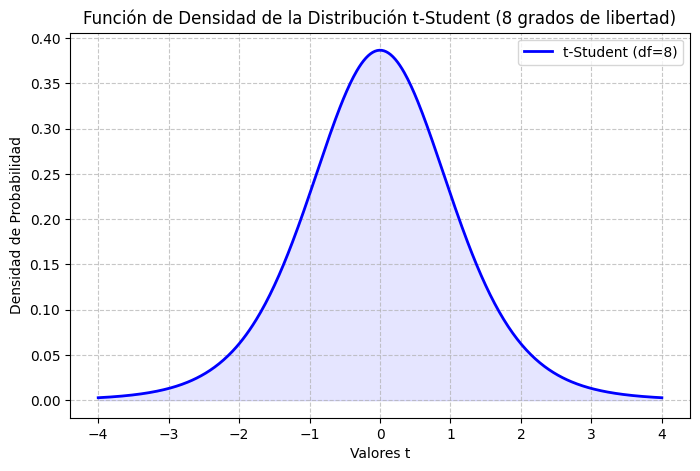

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


grados_lib = 8  

# Crear un rango de valores t para graficar la PDF
t_values = np.linspace(-4, 4, 500)  # Rango típico para la distribución t
pdf = stats.t.pdf(t_values, df=grados_lib)  # Función de densidad

# Graficar la PDF de la distribución t-Student
plt.figure(figsize=(8, 5))
plt.plot(t_values, pdf, 'b-', lw=2, label=f't-Student (df={grados_lib})')
plt.fill_between(t_values, pdf, color='blue', alpha=0.1)  # Relleno bajo la curva
plt.title('Función de Densidad de la Distribución t-Student (8 grados de libertad)')
plt.xlabel('Valores t')
plt.ylabel('Densidad de Probabilidad')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

2. Sea T una variable aleatoria con distribución t-student con 8 grados de libertad. Buscar el comando en
Python que le permita calcular el valor tα/2 tal que P(T > tα/2) = α/2. Calcular tα/2 para α = 0.01 y
α = 0.05. Compare con los valores que se encuentran en las tablas del texto guía.

In [ ]:
# Definir los niveles de significancia para los intervalos de confianza
alpha_1 = 0.05  # Nivel de significancia del 95%
alpha_2 = 0.01  # Nivel de significancia del 99%

archivo_xlsx = "datos_uni_ciencias.xlsx"  # Nombre del archivo Excel con los datos

# Leer el archivo Excel y crear un DataFrame (ya realizado previamente)
# df_manual = pd.read_excel(archivo_xlsx, engine="openpyxl")

columna_edad = "Edad"  # Nombre de la columna con las edades (ajusta si el nombre es diferente)
columna = datos[columna_edad]  # Obtener la columna de edades como una Serie de pandas

n = len(columna)  # Número de datos en la muestra
grados_libertad = n - 1  # Grados de libertad para la distribución t
print(f"Cantidad de datos: {n}")
print(f"Grados de libertad: {grados_libertad}\n")

# Calcular el valor crítico t_{α/2} para α = 0.05 (intervalo de confianza del 95%)
t_critico_005 = stats.t.ppf(1 - alpha_1/2, grados_libertad)  # Dos colas

# Calcular el valor crítico t_{α/2} para α = 0.01 (intervalo de confianza del 99%)
t_critico_001 = stats.t.ppf(1 - alpha_2/2, grados_libertad)  # Dos colas

# Mostrar los valores críticos calculados y los valores de tabla de referencia
print(f"Para α = 0.05 (95% confianza), t_{{α/2}} = {t_critico_005:.4f}")
print(f"Valor de tabla para α = 0.05 (99% confianza), t_{{α/2}} = 1.960\n")
print(f"Para α = 0.01 (99% confianza), t_{{α/2}} = {t_critico_001:.4f}")
print(f"Valor de tabla para α = 0.01 (99% confianza), t_{{α/2}} = 2.576")

3. Calcule la media y la desviación estándar muestral de la edad de los admitidos.

In [ ]:
# Calcular la media muestral de la columna de edades
media = np.mean(columna)

# Calcular la desviación estándar muestral (ddof=1 para muestra, equivalente a STDEV.S en Excel)
desv_muestral = np.std(columna, ddof=1)

# Imprimir los resultados
print(f"Media muestral: {media:.2f}")
print(f"Desviación estándar muestral: {desv_muestral:.4f}")

4. Calcule el intervalo de confianza del 99 % y 95 % para la media de la edad de admitidos. Suponga que
los datos son una muestra aleatoria de una población normal. Interprete sus resultados.

In [ ]:
# Definir los niveles de confianza
nivel_confianza_1 = 0.95  
nivel_confianza_2 = 0.99

# Obtener los valores críticos t para cada nivel de confianza
t_critico_1 = stats.t.ppf(1 - alpha_1/2, grados_libertad)
t_critico_2 = stats.t.ppf(1 - alpha_2/2, grados_libertad)

# Calcular el margen de error para cada intervalo de confianza
margen_error_1 = t_critico_1 * (desv_muestral / np.sqrt(n))
margen_error_2 = t_critico_2 * (desv_muestral / np.sqrt(n))

# Calcular los intervalos de confianza
intervalo_1 = (media - margen_error_1, media + margen_error_1)
intervalo_2 = (media - margen_error_2, media + margen_error_2)

# Imprimir los resultados
print(f"Intervalo de confianza al {nivel_confianza_1*100}%: ({intervalo_1[0]:.2f}, {intervalo_1[1]:.2f})")
print(f"Intervalo de confianza al {nivel_confianza_2*100}%: ({intervalo_2[0]:.2f}, {intervalo_2[1]:.2f})")

**Interpretación de resultados**

* Intervalo de confianza al 95%

    Con un 95% de confianza, la media poblacional (μ) se encuentra entre 17.78 y 18.43. Esto significa que si repitiéramos el muestreo muchas veces, el 95% de los intervalos construidos de esta manera contendrían la verdadera media poblacional.

* Intervalo de confianza al 99%

    Con un 99% de confianza, la media poblacional (μ) se encuentra entre 17.67 y 18.53. Este intervalo es más amplio que el del 95%, reflejando una mayor certeza (99%) a costa de menos precisión (rango más grande).

* Relación con el 95%

    A mayor confianza, más amplio es el intervalo para capturar la media real con mayor seguridad.

* Comparación de los Valores Críticos (t)

    Los valores críticos tα/2 son consistentes con una distribución t de Student con 444 grados de libertad. 
    Nota: Hay una discrepancia en los valores reportados para el 99% (2.5869 vs. 2.576). Esto podría deberse a redondeo o fuentes de tablas distintas, pero no afecta la interpretación general.

# 3. Parte III: Pruebas de hipótesis
Se desea evaluar si la proporción de mujeres admitidas a la Facultad de Ciencias en el 2013-I es mayor
que 0.5. Para ello realice una prueba de hipótesis con un nivel de significancia del 0.01. ¿Qué puede decir
para niveles de significancia más pequeños?

* Plantee la hipótesis nula y alternativa <br>

	$H_0$ : proporcion de mujeres admitidas igual a 0.5 (p = 0.5) <br>
	$H_1$ : proporcion de mujeres admitidas mayor a 0.5 (p > 0.5)

* Determine el estadístico de prueba adecuado y su distribución. <br>

	Al tratarse de una proporción, su estimación se relaciona con una distribución binomial para la poblacion estudiada, sin embargo, dado que el tamaño de la muestra es superior a 30 y guiándonos del Teorema del límite central (TLC), podemos afirmar que se trata de una distribucion normal con un estadistico de prueba Z:

<div>
<center>

### $z=\frac{x-nP_0}{\sqrt{np_0(1-p_0)}}$ 

</center>
</div>

Donde: 
α = 0.01, $p_0$ = 0.5, n = 455

In [13]:
columna_genero = "Genero"  # Nombre de la columna con los géneros
columna_genero = datos[columna_genero]  # Obtener la columna de géneros
# Contar la cantidad de mujeres en la columna de géneros
x = (columna_genero == 'F').sum()  # Asumiendo que 'F' representa mujeres
print(f"Cantidad de mujeres (x): {x}")


Cantidad de mujeres (x): 128


x(cantidad de aciertos)= 128 <br>

Así que, reemplazando en la formula tenemos:

<div>
<center>

### $z = \frac{128-455 * 0.5}{\sqrt{455*0.5*(1-0.5)}}$

</center>
</div>

In [14]:
z = (128-455*0.5)/(455*0.5*0.5)**(1/2)
print(f"Valor de z: {z:.4f}")

Valor de z: -9.3293
